In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

In [4]:
#function for basic analytics
def basic_analysis(df, name):
    print(f"\n{name} Dataset Analysis:")
    print(f"Total Records: {len(df)}")
    print("\nColumn Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe())

In [7]:
def customer_analysis(customers, transactions):
    # Customer signup trends
    customers['SignupYear'] = pd.to_datetime(customers['SignupDate']).dt.year
    signup_counts = customers['SignupYear'].value_counts().sort_index()

    plt.figure(figsize=(10,5))
    signup_counts.plot(kind='bar')
    plt.title('Customer Signups by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Signups')
    plt.tight_layout()
    plt.show()

    region_dist = customers['Region'].value_counts()
    plt.figure(figsize=(10,5))
    region_dist.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Customer Distribution by Region')
    plt.tight_layout()
    plt.show()

In [8]:
def product_analysis(products, transactions):
    # Product category distribution
    category_dist = products['Category'].value_counts()
    plt.figure(figsize=(10,5))
    category_dist.plot(kind='bar')
    plt.title('Product Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.tight_layout()
    plt.show()

    # Price analysis by category
    price_by_category = products.groupby('Category')['Price'].agg(['mean', 'min', 'max'])
    print("\nPrice Analysis by Product Category:")
    print(price_by_category)

In [9]:
def transaction_analysis(transactions):
    # Convert transaction date
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

    # Monthly transaction volume
    monthly_transactions = transactions.resample('M', on='TransactionDate').size()
    plt.figure(figsize=(12,5))
    monthly_transactions.plot(kind='line')
    plt.title('Monthly Transaction Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.tight_layout()
    plt.show()

    # Total transaction value
    print("\nTransaction Value Statistics:")
    print(transactions['TotalValue'].describe())

In [10]:
basic_analysis(customers, 'Customers')


Customers Dataset Analysis:
Total Records: 200

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Descriptive Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [11]:
basic_analysis(products, 'Products')


Products Dataset Analysis:
Total Records: 100

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Descriptive Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [12]:
basic_analysis(transactions, 'Transactions')


Transactions Dataset Analysis:
Total Records: 1000

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Descriptive Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std   

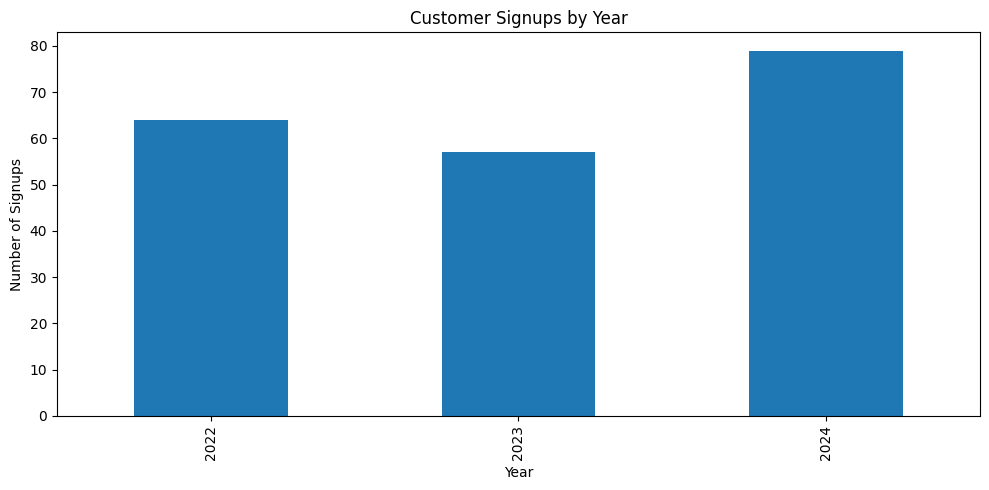

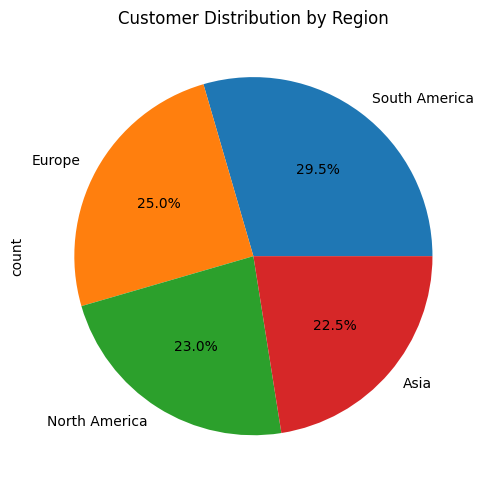

In [13]:
customer_analysis(customers, transactions)

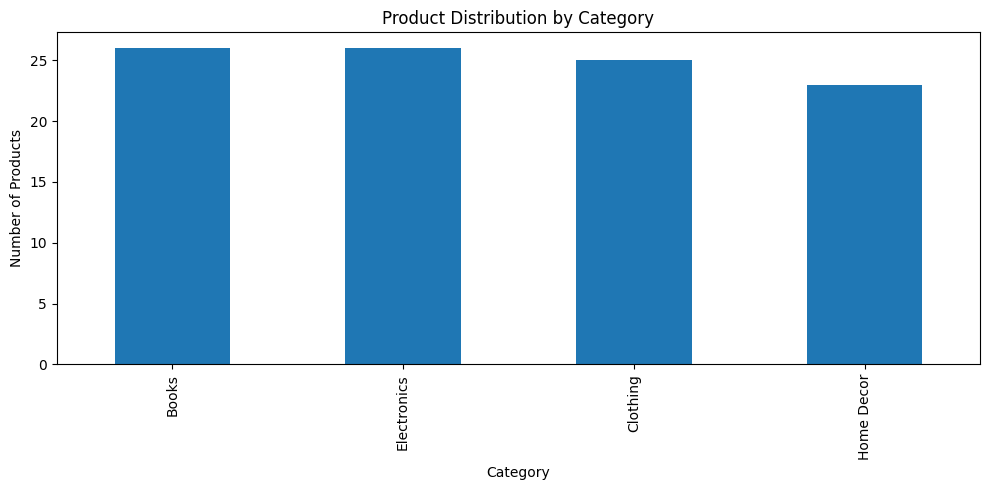


Price Analysis by Product Category:
                   mean    min     max
Category                              
Books        292.212308  33.59  497.76
Clothing     263.720000  18.82  481.78
Electronics  275.353462  16.08  459.86
Home Decor   235.020000  41.18  454.53


In [14]:
product_analysis(products, transactions)

<ipython-input-9-15bc8bd9974d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = transactions.resample('M', on='TransactionDate').size()


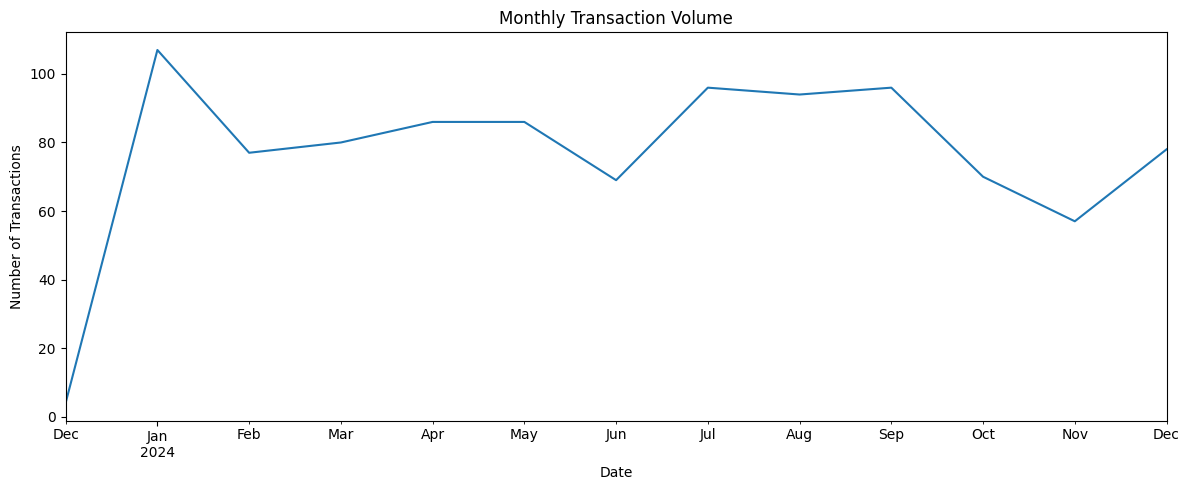


Transaction Value Statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


In [15]:
transaction_analysis(transactions)

In [16]:
# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')

In [17]:
# Customer Purchase Frequency Analysis
purchase_frequency = merged_data.groupby('CustomerID').size().reset_index(name='PurchaseCount')
purchase_frequency['PurchaseFrequencyCategory'] = pd.cut(
    purchase_frequency['PurchaseCount'],
    bins=[0, 1, 3, 5, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [18]:
regional_spending = merged_data.groupby('Region').agg({
    'TotalValue': ['sum', 'mean', 'count']
}).reset_index()
regional_spending.columns = ['Region', 'TotalRevenue', 'AverageSpend', 'TransactionCount']
regional_spending['MarketShare'] = regional_spending['TotalRevenue'] / regional_spending['TotalRevenue'].sum() * 100

Text(0.5, 1.0, 'Customer Purchase Frequency')

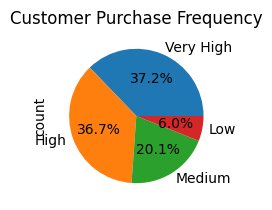

In [21]:
plt.subplot(2, 2, 1)
purchase_frequency['PurchaseFrequencyCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Purchase Frequency')


([0, 1, 2, 3],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'South America')])

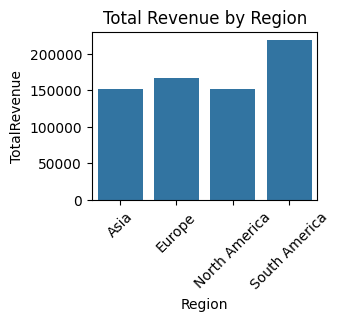

In [22]:
plt.subplot(2, 2, 2)
sns.barplot(x='Region', y='TotalRevenue', data=regional_spending)
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Market Share by Region')

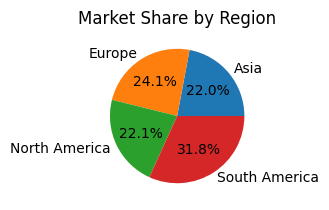

In [23]:
# Market Share Pie Chart
plt.subplot(2, 2, 4)
plt.pie(regional_spending['MarketShare'], labels=regional_spending['Region'], autopct='%1.1f%%')
plt.title('Market Share by Region')

In [25]:
print("Purchase Frequency Breakdown:")
print(purchase_frequency['PurchaseFrequencyCategory'].value_counts())

Purchase Frequency Breakdown:
PurchaseFrequencyCategory
Very High    74
High         73
Medium       40
Low          12
Name: count, dtype: int64


In [26]:
print("\nRegional Spending Insights:")
print(regional_spending)


Regional Spending Insights:
          Region  TotalRevenue  AverageSpend  TransactionCount  MarketShare
0           Asia     152074.97    697.591606               218    22.039993
1         Europe     166254.63    710.489872               234    24.095029
2  North America     152313.40    624.235246               244    22.074548
3  South America     219352.56    721.554474               304    31.790431
